## Import Modules

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rc('figure', figsize=(15.0, 10.0))

In [2]:
DATASET = r'Dataset/dataset.csv'

In [3]:
dataset = pd.read_csv(DATASET, sep=',', index_col=0, encoding = "ISO-8859-1")

## Dataset Preprocessing

In [4]:
dataset.shape

(86, 16)

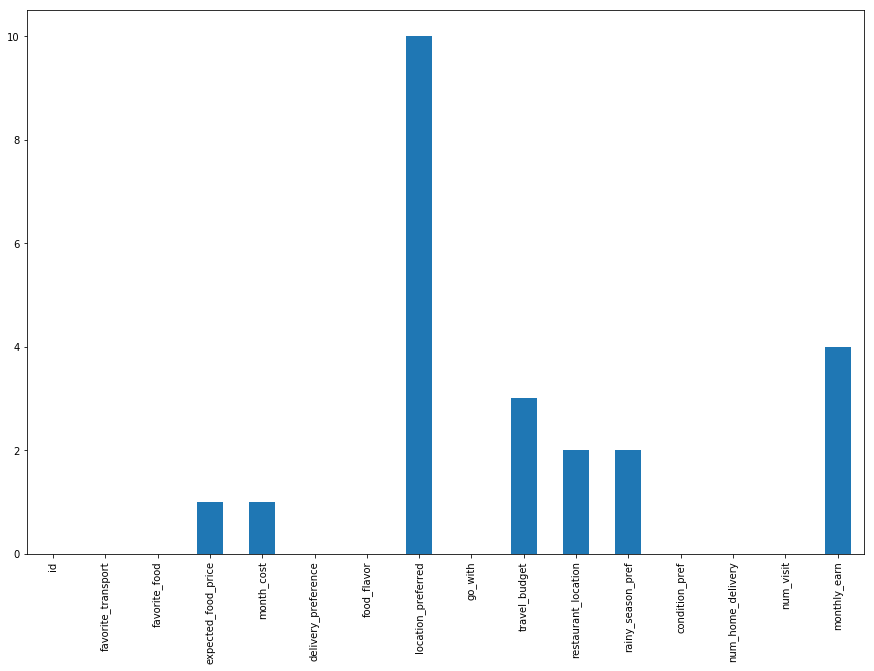

In [5]:
dataset.isnull().sum(axis=0).plot(kind='bar')

In [6]:
dataset.corr()

,id,expected_food_price,month_cost,travel_budget,num_home_delivery,num_visit,monthly_earn
id,1.000000,0.032128,0.054449,0.165974,-0.165129,0.123032,0.057154
expected_food_price,0.032128,1.000000,0.183736,0.005755,0.025382,0.051319,-0.056743
month_cost,0.054449,0.183736,1.000000,0.173276,0.115702,0.116579,0.101084
travel_budget,0.165974,0.005755,0.173276,1.000000,0.178392,0.140395,0.257500
num_home_delivery,-0.165129,0.025382,0.115702,0.178392,1.000000,0.017090,0.074649
num_visit,0.123032,0.051319,0.116579,0.140395,0.017090,1.000000,0.060098
monthly_earn,0.057154,-0.056743,0.101084,0.257500,0.074649,0.060098,1.000000


In [7]:
dataset.columns

Index(['id', 'favorite_transport', 'favorite_food', 'expected_food_price',
       'month_cost', 'delivery_preference', 'food_flavor',
       'location_preferred', 'go_with', 'travel_budget', 'restaurant_location',
       'rainy_season_pref', 'condition_pref', 'num_home_delivery', 'num_visit',
       'monthly_earn'],
      dtype='object')

In [8]:
int_col = ['id', 'expected_food_price', 'month_cost', 'travel_budget', 'num_home_delivery', 'num_visit', 'monthly_earn']
str_col = set(dataset.columns) - set(int_col)

In [9]:
str_col = list(str_col)

In [10]:
for col in dataset.columns:
    if col in int_col:
        dataset[col] = dataset[col].fillna(0)
        dataset[col] = dataset[col].astype(np.float64)
    else:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
        dataset[col] = dataset[col].astype(str)
        dataset[col] = dataset[col].str.lower()

### Correlation among the numeric data

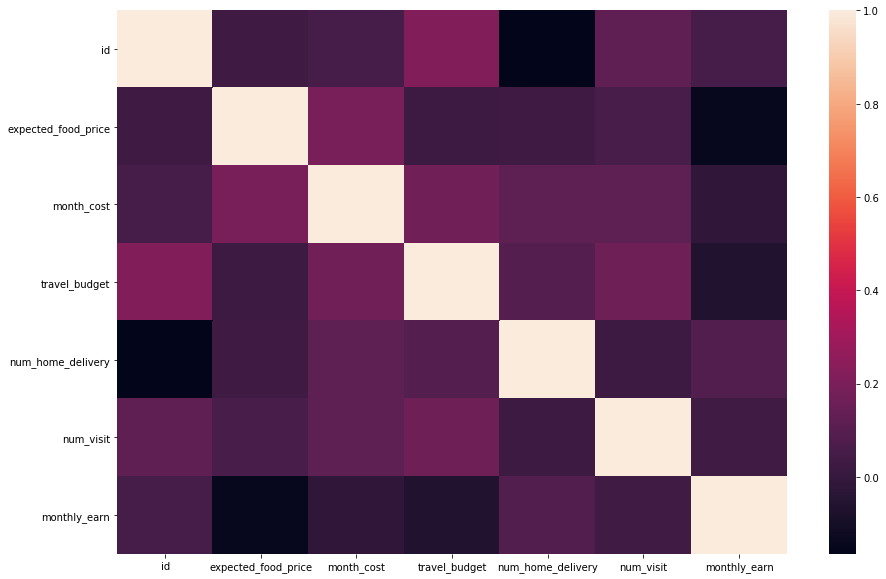

In [11]:
sns.heatmap(dataset.corr())

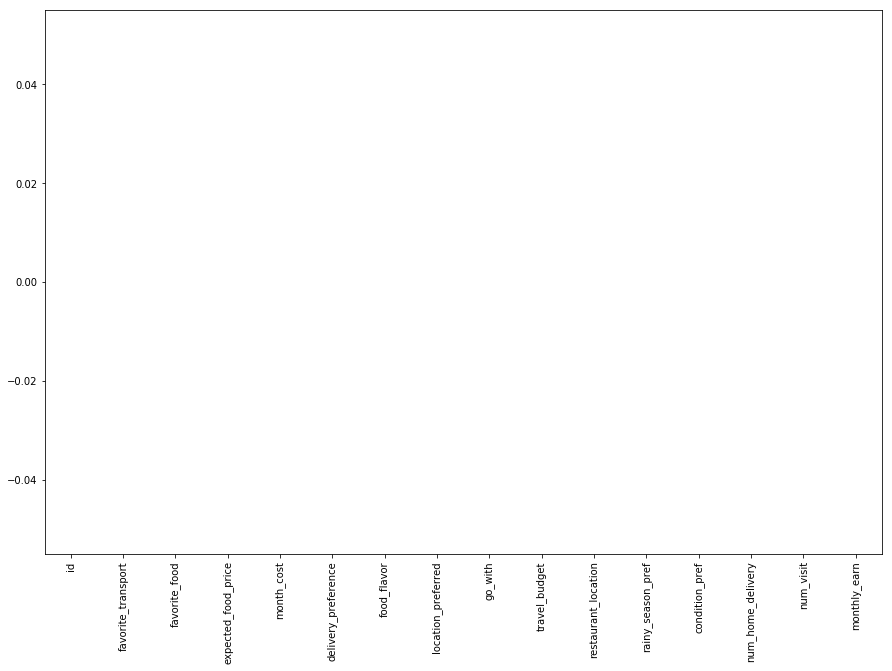

In [12]:
dataset.isnull().sum(axis=0).plot(kind='bar')

In [13]:
def plot_num(df,feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

## Univariate Analysis

### Numeric Data

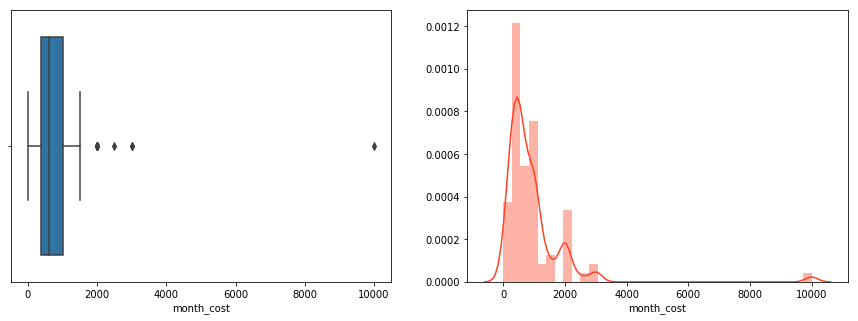

In [14]:
plot_num(dataset,'month_cost')

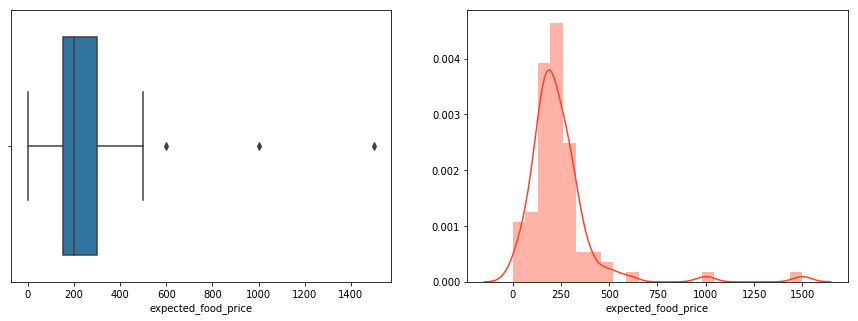

In [15]:
plot_num(dataset,'expected_food_price')

In [16]:
def plot_cat(df, feature):
  plt.figure(figsize=(15,5))
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)

### Categorical Data

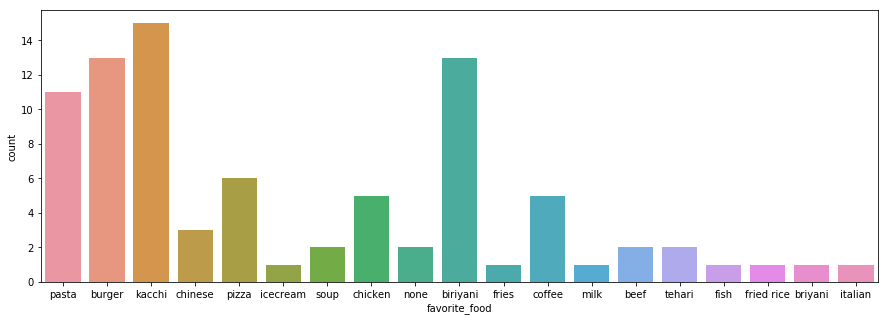

In [17]:
plot_cat(dataset, 'favorite_food')

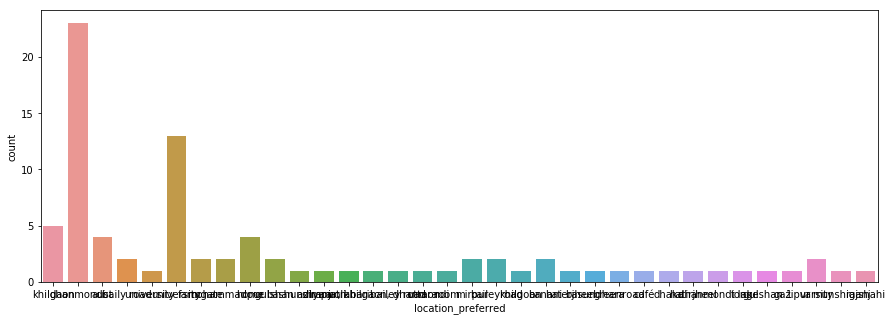

In [18]:
plot_cat(dataset, 'location_preferred')

## Bivariate Analysis

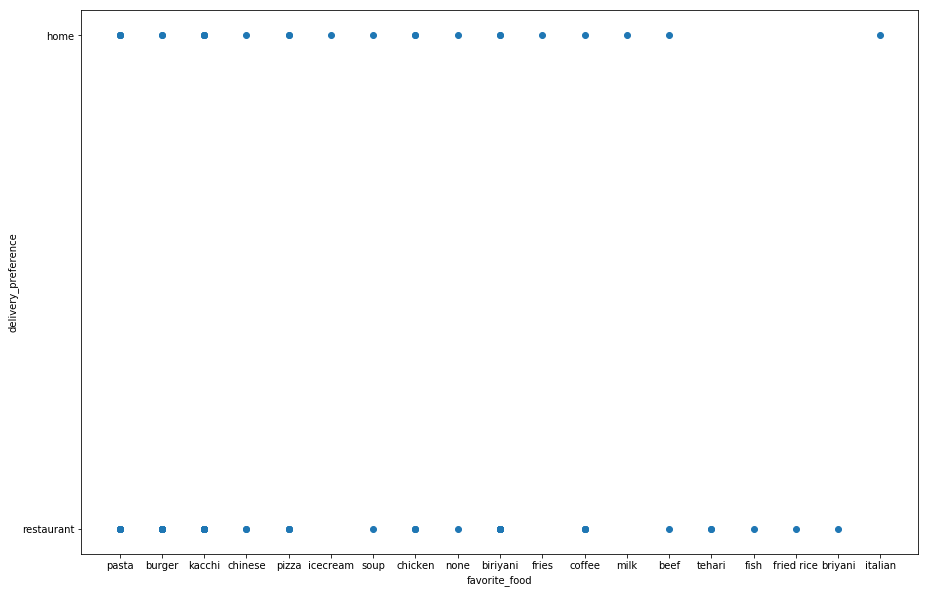

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['favorite_food'], y = dataset['delivery_preference'])
plt.ylabel('delivery_preference')
plt.xlabel('favorite_food')
plt.show()

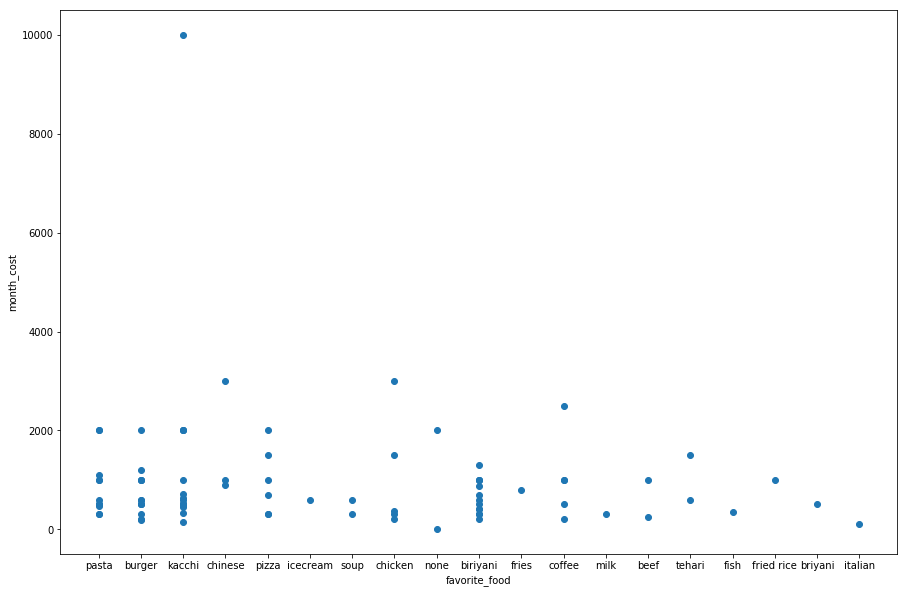

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['favorite_food'], y = dataset['month_cost'])
plt.ylabel('month_cost')
plt.xlabel('favorite_food')
plt.show()

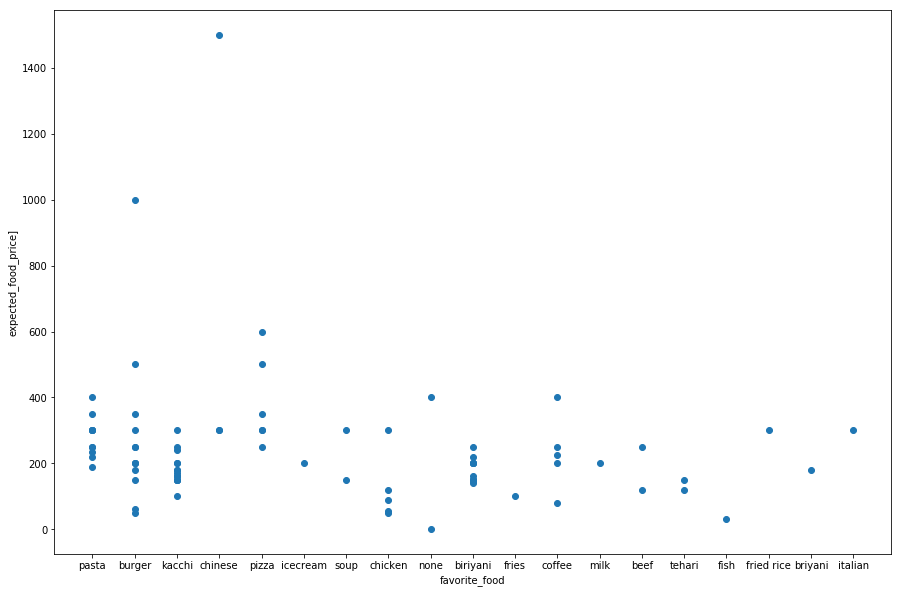

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['favorite_food'], y = dataset['expected_food_price'])
plt.ylabel('expected_food_price]')
plt.xlabel('favorite_food')
plt.show()

In [22]:
label = dataset['delivery_preference']

In [23]:
dataset.drop(['delivery_preference', 'id'], axis=1, inplace=True)

## OneHot Representation

In [24]:
dataset = pd.get_dummies(dataset)

In [25]:
dataset.head()

,expected_food_price,month_cost,travel_budget,num_home_delivery,num_visit,monthly_earn,favorite_transport_bus,favorite_transport_car,favorite_transport_cycle,favorite_transport_rickshaw,...,rainy_season_pref_soup,rainy_season_pref_spicy,rainy_season_pref_tea,condition_pref_both,condition_pref_enviroment,condition_pref_environment,condition_pref_food,condition_pref_food_quality,condition_pref_fresh,condition_pref_good
1,400.0,1000.0,6000.0,0.0,4.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,200.0,600.0,7500.0,1.0,4.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,150.0,150.0,5000.0,2.0,5.0,0.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,1500.0,3000.0,2500.0,2.0,5.0,1000.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,300.0,900.0,5000.0,2.0,5.0,0.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


****

***

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size=0.15, shuffle=True)

## Feature Selection

In [32]:

pca = PCA(n_components=5)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



## Classification

In [33]:
models = {
          'GaussianNB': GaussianNB(),
          'Logistic': linear_model.LogisticRegression(C=1e5),
          'Decision Tree': DecisionTreeClassifier(random_state=20160121, criterion='entropy'),
          'GaussianNB': GaussianNB(),
          'K-NN ': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Stochastic Gradient Descent': SGDClassifier(),
          'Multi-layer Perceptron': MLPClassifier()
        }

In [34]:
results_svd = pd.DataFrame()

foldnum = 0
tfprediction = {}
cprediction = {}

for name, model in models.items():
        model.fit(X_train, Y_train)
        tfprediction[name] = model.predict(X_test)
        tfaccuracy = accuracy_score(tfprediction[name], Y_test)

        results_svd.loc[foldnum, 'Model'] = name
        results_svd.loc[foldnum, 'TF-IDF Accuracy'] = tfaccuracy

        foldnum = foldnum+1

print(results_svd)
print('\n')
for name, model in models.items():
    print("Classification report for ", name)
    print(classification_report(Y_test, tfprediction[name]))
    print(confusion_matrix(Y_test, tfprediction[name]))
    print("\n")

                         Model  TF-IDF Accuracy
0                   GaussianNB         0.384615
1                     Logistic         0.846154
2                Decision Tree         0.769231
3                        K-NN          0.923077
4                Random Forest         0.769231
5  Stochastic Gradient Descent         0.384615
6       Multi-layer Perceptron         0.769231


Classification report for  GaussianNB
             precision    recall  f1-score   support

       home       0.20      1.00      0.33         2
 restaurant       1.00      0.27      0.43        11

avg / total       0.88      0.38      0.41        13

[[2 0]
 [8 3]]


Classification report for  Logistic
             precision    recall  f1-score   support

       home       0.00      0.00      0.00         2
 restaurant       0.85      1.00      0.92        11

avg / total       0.72      0.85      0.78        13

[[ 0  2]
 [ 0 11]]


Classification report for  Decision Tree
             precision    recal